In [1]:
%pip install scikitplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for scikitplot


In [1]:
%matplotlib inline
import dtreeviz
from feature_engine import encoding, imputation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import base, compose, datasets, ensemble, \
metrics, model_selection, pipeline, preprocessing, tree
#import scikitplot
import xgboost as xgb
import yellowbrick.model_selection as ms
from yellowbrick import classifier
import urllib
import zipfile
import xg_help as xhelp
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
'kaggle-survey-2018.zip'
fname = 'kaggle-survey-2018.zip'
member_name = 'multipleChoiceResponses.csv'

In [2]:
raw = xhelp.extract_zip(url, fname, member_name)
## Create raw X and raw y
kag_X, kag_y = xhelp.get_rawX_y(raw, 'Q6')
## Split data
kag_X_train, kag_X_test, kag_y_train, kag_y_test = \
model_selection.train_test_split(
kag_X, kag_y, test_size=.3, random_state=42, stratify=kag_y)
## Transform X with pipeline
X_train = xhelp.kag_pl.fit_transform(kag_X_train)
X_test = xhelp.kag_pl.transform(kag_X_test)
## Transform y with label encoder
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(kag_y_train)
y_train = label_encoder.transform(kag_y_train)
y_test = label_encoder.transform(kag_y_test)
# Combined Data for cross validation/etc
X = pd.concat([X_train, X_test], axis='index')
y = pd.Series([*y_train, *y_test], index=X.index)

c:\VSC\XGBoost\xg_help.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
c:\VSC\XGBoost\xg_help.py:102: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
c:\VSC\XGBoost\xg_help.py:103: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
c:\VSC\XGBoost\xg_help.py:104: FutureWarning: Downcasting behavior in `replace` 

In [3]:
%pip install hyperopt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
xgb_def = xgb.XGBClassifier()
xgb_def.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [5]:
xgb_def.score(X_test, y_test)

0.7447513812154696

In [6]:
from sklearn import metrics

metrics.accuracy_score(y_test, xgb_def.predict(X_test))

0.7447513812154696

In [7]:
cm = metrics.confusion_matrix(y_test,xgb_def.predict(X_test))
cm

array([[370, 124],
       [107, 304]])

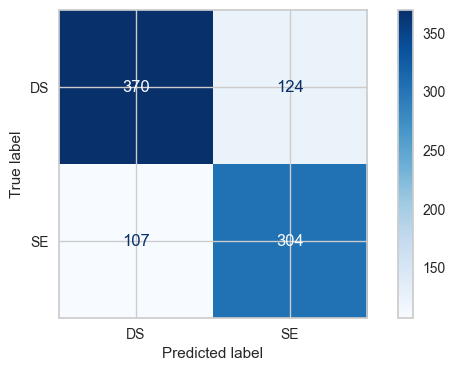

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=['DS', 'SE'])

disp.plot(ax=ax, cmap='Blues')

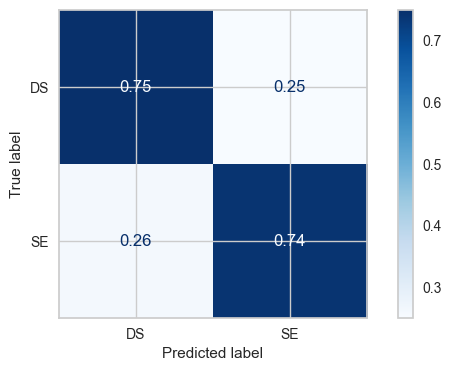

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
cm = metrics.confusion_matrix(y_test, xgb_def.predict(X_test),
normalize='true')
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=['DS', 'SE'])
disp.plot(ax=ax, cmap='Blues')

In [10]:
metrics.precision_score(y_test, xgb_def.predict(X_test))


0.7102803738317757

In [11]:
metrics.recall_score(y_test, xgb_def.predict(X_test))

0.7396593673965937

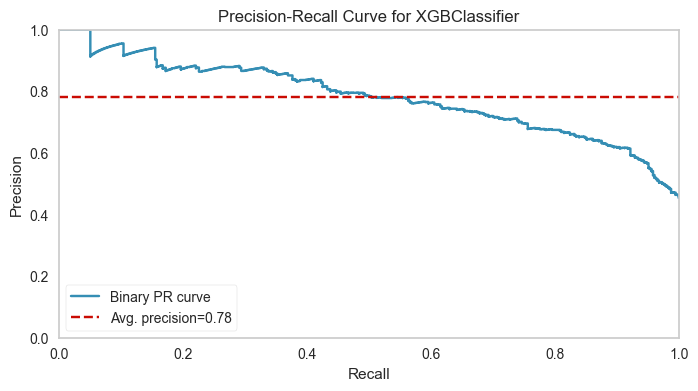

(0.0, 1.05)

In [12]:
from yellowbrick import classifier

fig, ax = plt.subplots(figsize=(8, 4))
classifier.precision_recall_curve(xgb_def, X_train, y_train,
X_test, y_test, micro=False, macro=False, ax=ax, per_class=True)
ax.set_ylim((0,1.05))

In [13]:
print(
    metrics.classification_report(y_test,y_pred=xgb_def.predict(X_test), 
    target_names=['DS', 'SE'])
    )

              precision    recall  f1-score   support

          DS       0.78      0.75      0.76       494
          SE       0.71      0.74      0.72       411

    accuracy                           0.74       905
   macro avg       0.74      0.74      0.74       905
weighted avg       0.75      0.74      0.75       905



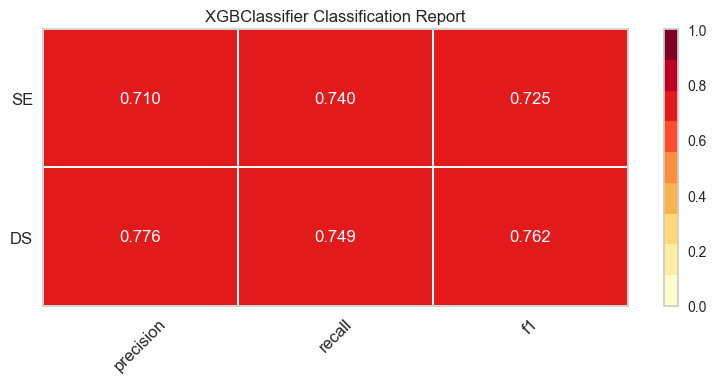

ClassificationReport(ax=<Axes: title={'center': 'XGBClassifier Classification Report'}>,
                     classes=['DS', 'SE'],
                     cmap=<matplotlib.colors.ListedColormap object at 0x00000231B03BBC50>,
                     estimator=XGBClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable...
                                             feature_weights=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None, ...))

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

classifier.classification_report(xgb_def, X_train, y_train,
X_test, y_test, classes=['DS', 'SE'],
micro=False, macro=False, ax=ax)

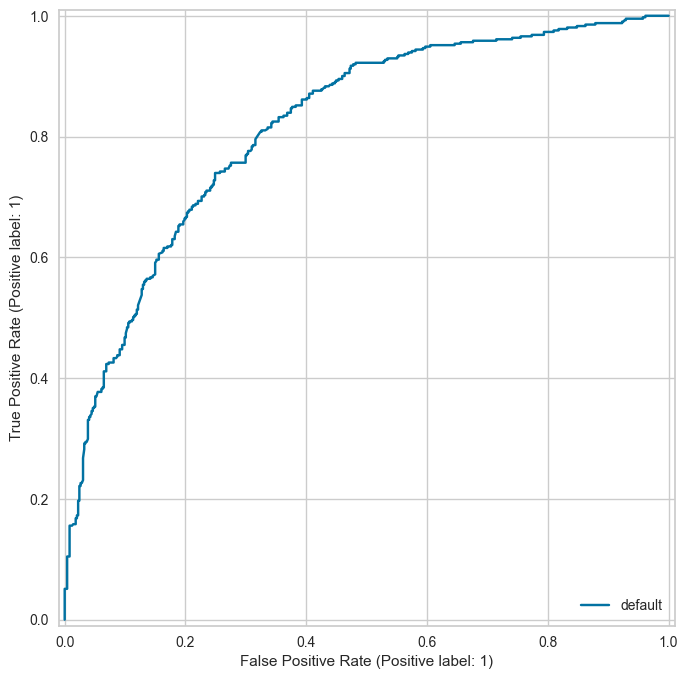

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

metrics.RocCurveDisplay.from_estimator(xgb_def,
X_test, y_test,ax=ax, label='default')


[Text(0.5, 1.0, 'ROC plots for default model')]

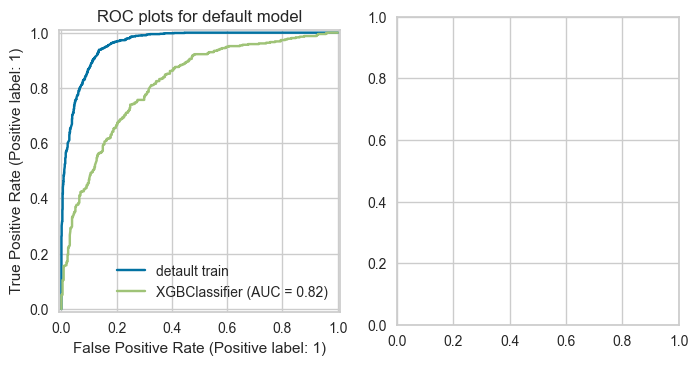

In [19]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)

 
metrics.RocCurveDisplay.from_estimator(xgb_def,
X_train, y_train,ax=axes[0], label='detault train')
metrics.RocCurveDisplay.from_estimator(xgb_def,
X_test, y_test,ax=axes[0])
axes[0].set(title='ROC plots for default model')